In [6]:
import acalib

In [7]:
!ls -lah

total 41G
drwxrwxr-x 4 mauricio mauricio 4,0K ago  2 14:57 .
drwxrwxr-x 5 mauricio mauricio 4,0K jul 26 15:48 ..
drwxrwxr-x 4 mauricio mauricio 4,0K dic 15  2015 2013.1.00662.S
-rw-rw-r-- 1 mauricio mauricio 1,3K jul 26 15:49 2013.1.00662.S.readme.txt
-rw-rw-r-- 1 mauricio mauricio  18G jul 26 18:58 2013.1.00662.S_uid___A001_X145_Xc4_001_of_001.tar
-rw-rw-r-- 1 mauricio mauricio 7,1G jul 26 18:03 2013.1.00662.S_uid___A001_X145_Xc6_001_of_001.tar
-rw-rw-r-- 1 mauricio mauricio  11G jul 26 18:24 2013.1.00662.S_uid___A001_X145_Xcc_001_of_001.tar
-rw-rw-r-- 1 mauricio mauricio 2,0G jul 26 16:41 2013.1.00662.S_uid___A001_X145_Xce_001_of_001.tar
-rw-rw-r-- 1 mauricio mauricio 1,1M jul 26 17:00 calibrated_final_cont.flux.fits
-rw-rw-r-- 1 mauricio mauricio 4,4K jul 26 17:00 calibrated_final_cont.mask.tgz
-rw-rw-r-- 1 mauricio mauricio 1,1M jul 26 17:00 calibrated_final_cont.pbcor.fits
-rw-rw-r-- 1 mauricio mauricio 235K ago  2 14:57 compact-OMC-3_CH3CN.ipynb
-rw-rw-r-- 1 mauricio mauricio 3,0

In [3]:
cube = acalib.load('OMC-3_CH3CN.pbcor.fits')

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: Removing superfluous dimension STOKES (kept in the metadata) [acalib.io.fits]


In [4]:
cube.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.859125029200001  -5.1762312283460004  91993813792.199997  
CRPIX : 257.0  257.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.00078333333333329997  0.00078333333333329997  -35283.409301760003  
NAXIS    : 512 512

In [5]:
cube.select_region(interactive=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [8]:
usable=cube.cut([[0, 124, 220], [599, 351, 347]])

In [9]:
usable.visualize()

/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/ipyvolume/serialize.py:29: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


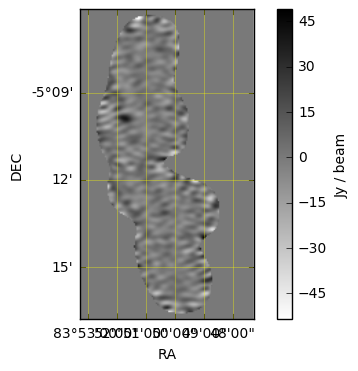

In [11]:
usable.visualize_image()

In [12]:
usable=acalib.standarize(usable)

INFO: overwriting Masked Objects's current mask with specified mask. [astropy.nddata.nddata]


/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


In [13]:
usable,yf,sf = usable

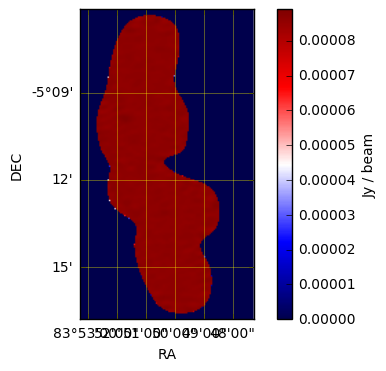

In [23]:
usable.visualize_image(cmap="seismic")

In [16]:
import numpy as np
import scipy
A=np.array(usable.mask,dtype=int)
B=scipy.ndimage.morphology.distance_transform_edt(1-A) 

In [20]:
C=B/25.0
C[C>1.0]=1.0
dat = usable.data*C

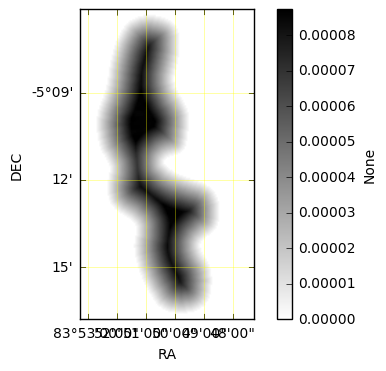

In [21]:
acalib.visualize_image(acalib.moment0(dat,wcs=usable.wcs,mask=usable.mask))

In [22]:
acalib.visualize_volume(dat,wcs=usable.wcs,unit=usable.unit)

/home/mauricio/anaconda3/envs/astro3.5/lib/python3.5/site-packages/ipyvolume/serialize.py:29: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [ ]:
cubep=cube.cut([[0, 256, 242], [599, 285, 268]])


In [ ]:
scube,yf,ls= acalib.standarize(cube)

In [ ]:
A=np.array(scube.mask,dtype=int)
B=scipy.ndimage.morphology.distance_transform_edt(1-A) 
C=B/20.0
C[C>1.0]=1.0
dat = scube.data*C

In [ ]:
acalib.visualize_image(acalib.moment0(dat,wcs=scube.wcs,mask=scube.mask),cmap="seismic")

In [ ]:
scube.visualize_image(cmap="seismic")

In [ ]:
cubep.visualize()

In [ ]:
(cube_standard,ym,yf)=acalib.standarize(cube)
result=acalib.core.snr_estimation(cube_standard.data,mask=cube.mask,points=1000,full_output=True)

In [ ]:
# Display it
import matplotlib.pyplot as plt
acalib.plot_snr_estimation("OMC-3_CH3CN Emission",result)
plt.show()

In [ ]:
# unpack
(snrlimit, noise, _, _, _, _, _) = result
print(snrlimit)
print(noise)

In [ ]:
halgo = acalib.HRep()
halgo.config['NOISE'] = noise
halgo.config['SNR'] = snrlimit
halgo.config['KERNEL'] = 'METABUBBLE'
halgo.config['VERBOSE'] = True
%time (rep,syn,res) = halgo.run(cube)


In [ ]:
#from astropy.io import ascii
#tab=rep['center'].data
#ascii.write(tab,"REP-OrionBar-CO.dat")
rep.write('REP-OrionBar-CO.fits',overwrite=True)
hdu=acalib.Data_to_HDU(syn,primary=True)
hdu.writeto("SYN-OrionBar-CO.fits",clobber=True)
hdu=acalib.Data_to_HDU(res,primary=True)
hdu.writeto("RES-OrionBar-CO.fits",clobber=True)